In [1]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# determined in EDA notebook
channel_means = [0.45587662, 0.49715131, 0.37855863]
channel_stds = [0.18720555, 0.17101169, 0.19548449]

def resize_and_sharpen(image_path, ar_limits=(0, 100)):
    with Image.open(image_path) as img:
        width, height = img.size
        aspect_ratio = width / height
        if aspect_ratio < ar_limits[0] or aspect_ratio > ar_limits[1]:
            return None # I have decided to ignore files that will get too distorted by the resizing
        
        transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.Lambda(lambda img: transforms.functional.adjust_sharpness(img, sharpness_factor=2)),
            transforms.ToTensor(),
            transforms.Normalize(mean=channel_means, std=channel_stds)
        ])
        img_transformed = transform(img)
        return img_transformed
# TODO: find optimal sharpness factor and ar_limits

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.907119..3.1789804].


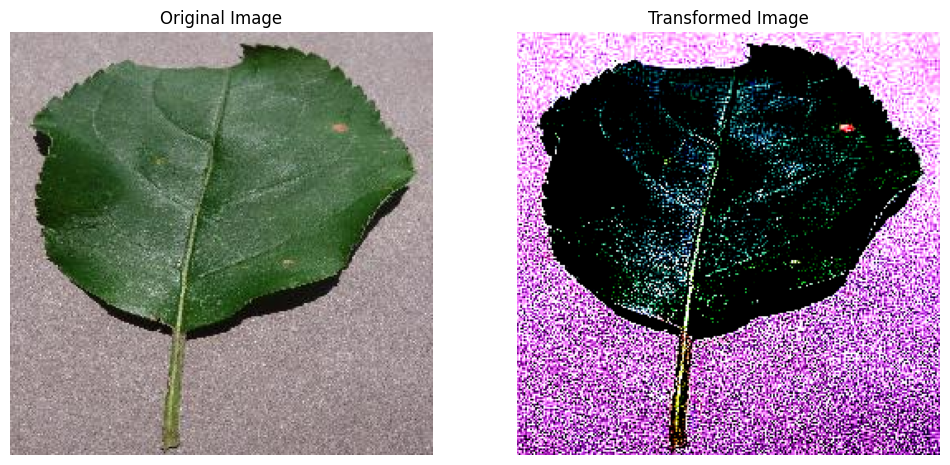

In [32]:
new_img = resize_and_sharpen('data/Apple___black_rot/27959.jpg')
new_img_np = new_img.numpy().transpose((1, 2, 0))
original_img = Image.open('data/Apple___black_rot/27959.jpg')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original image
axes[0].imshow(original_img)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot the transformed image
axes[1].imshow(new_img_np)
axes[1].set_title('Transformed Image')
axes[1].axis('off')

plt.show()
